# Analysis

### Import results csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('wyniki.csv')

In [3]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
data.head()

,loss,accuracy,training_time,test_time,type,size
0,0.772733,0.791092,54180.209511,111.119267,I,12000
1,0.805651,0.757158,19286.888266,123.175905,I,4000
2,0.787039,0.770944,20016.932595,117.696040,I,4000
3,0.806586,0.765642,20512.247618,144.491314,I,4000
4,0.805171,0.769883,20448.563713,144.545126,I,4000


In [5]:
data.shape

(100, 6)

In [6]:
df_gr = data.groupby(by=['type', 'size'])
df_gr.count()

loss  accuracy  training_time  test_time
type  size                                           
I     4000      5         5              5          5
      8000      5         5              5          5
      12000     5         5              5          5
      16000     5         5              5          5
      20580     5         5              5          5
MN    4000      5         5              5          5
      8000      5         5              5          5
      12000     5         5              5          5
      16000     5         5              5          5
      20580     5         5              5          5
VGG19 4000      5         5              5          5
      8000      5         5              5          5
      12000     5         5              5          5
      16000     5         5              5          5
      20580     5         5              5          5
XC    4000      5         5              5          5
      8000      5         5              5          5
      12000     5         5              5          5
      16000     5         5              5          5
      20580     5         5              5          5

There is 5 training samples for each size for each model, 100 training examples.

In [7]:
mean_accuracy = df_gr.mean()
mean_accuracy

loss  accuracy  training_time   test_time
type  size                                                
I     4000   0.795434  0.767975   19912.791275  134.903483
      8000   0.774748  0.783457   37567.710963  123.760462
      12000  0.764269  0.784730   51793.733208  157.502532
      16000  0.754234  0.787911   71815.954167  137.388871
      20580  0.728078  0.794062   86144.920177  145.930582
MN    4000   1.314492  0.609968   15080.655499   73.428583
      8000   1.073465  0.677200   26362.106390   84.395763
      12000  1.005909  0.680594   39516.696867   77.018178
      16000  0.923544  0.711347   50182.621728   79.324551
      20580  0.871851  0.729799   62835.802410   80.198879
VGG19 4000   2.884744  0.489502   42445.743963  349.663152
      8000   2.167874  0.580912   76557.909155  336.372702
      12000  2.017268  0.621209  117890.868681  384.565453
      16000  1.885835  0.634146  162305.568797  376.802892
      20580  1.805516  0.652598  218189.565121  323.110471
XC    4000   0.782773  0.769883   22801.935171  181.169705
      8000   0.741406  0.784517   41853.295252  144.484366
      12000  0.745964  0.777094   61882.451426  168.608917
      16000  0.748002  0.775186   82663.464548  182.725421
      20580  0.737665  0.787911  104436.365043  156.426088

## Visualizations

### Accuracy

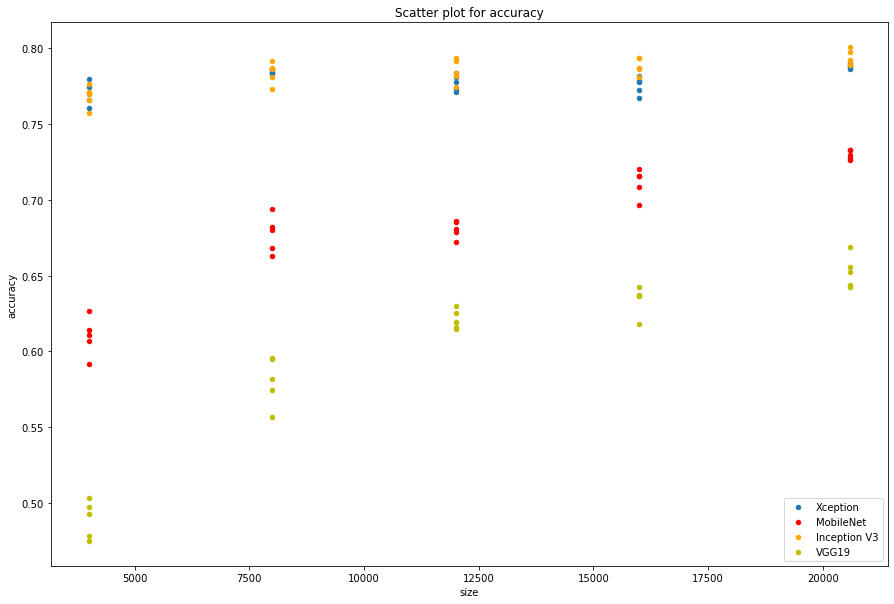

In [8]:
xc = data[data['type']=='XC']
mn = data[data['type']=='MN']
i = data[data['type']=='I']
vgg = data[data['type']=='VGG19']

ax = xc.plot(kind='scatter', x='size', y='accuracy', label='Xception', figsize=(15,10), 
            title='Scatter plot for accuracy')
mn.plot(kind='scatter', x='size', y='accuracy', label='MobileNet', c='r', figsize=(15,10), ax=ax)
i.plot(kind='scatter', x='size', y='accuracy', label='Inception V3', c='orange', figsize=(15,10), ax=ax)
vgg.plot(kind='scatter', x='size', y='accuracy', label='VGG19', c='y', figsize=(15,10), ax=ax);

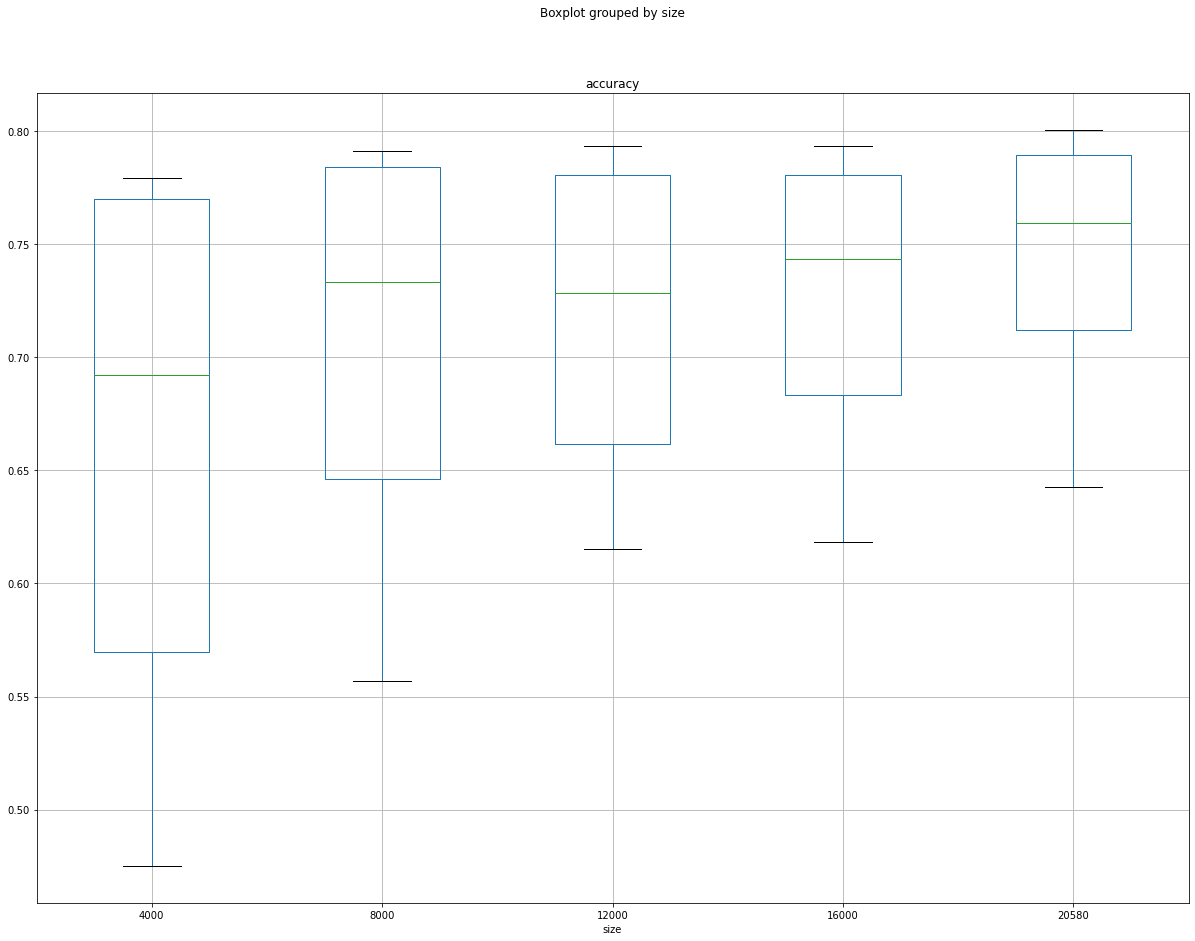

In [20]:
data.boxplot(by='size', column='accuracy', figsize=(20, 15));

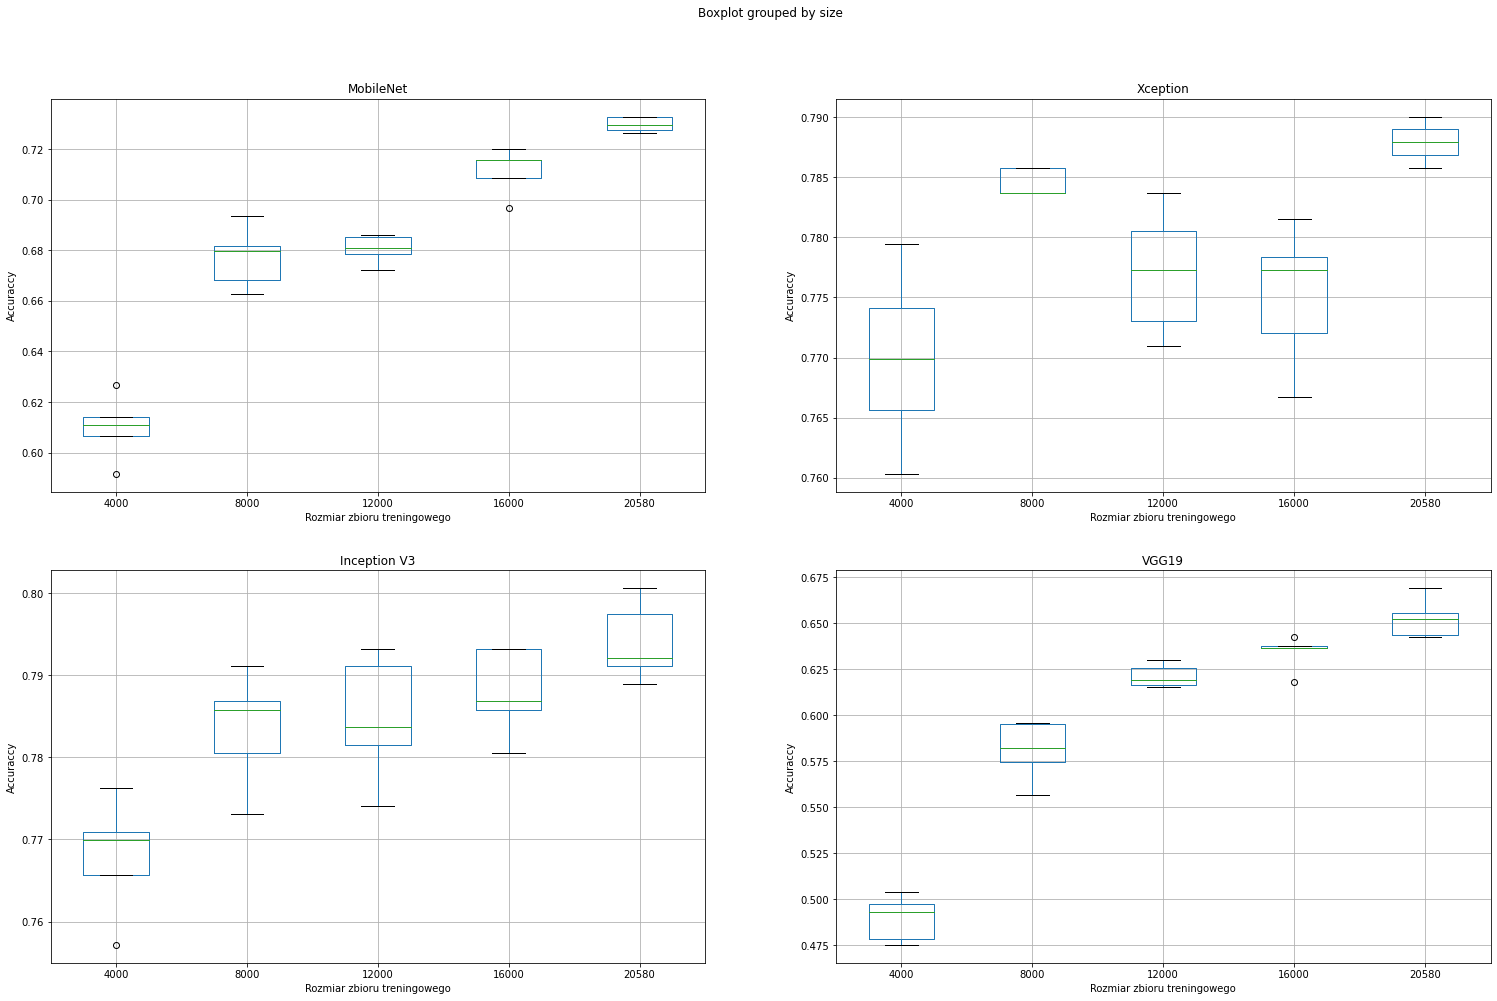

In [10]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(25,16))
fig.suptitle('Accuraccy', fontsize=30)

data[data['type']=='MN'].boxplot(by='size', column='accuracy', ax=axes[0,0])
axes[0,0].set_title('MobileNet')

data[data['type']=='XC'].boxplot(by='size', column='accuracy', ax=axes[0,1])
axes[0,1].set_title('Xception')

data[data['type']=='I'].boxplot(by='size', column='accuracy', ax=axes[1,0])
axes[1,0].set_title('Inception V3')

data[data['type']=='VGG19'].boxplot(by='size', column='accuracy', ax=axes[1,1])
axes[1,1].set_title('VGG19')

for c in axes:
    for ax in c:
        ax.set_xlabel('Rozmiar zbioru treningowego', fontsize=10)
        ax.set_ylabel('Accuraccy', fontsize=10)
    
plt.show()

In the case of accuracy, you can see a growing trend for each of the algorithms. There are some deviations from it but the overall trend is maintained. In the case of the MobileNet and VGG19 algorithms, the greatest increase is visible, where for Inception and Xception the change is smaller

### Training time

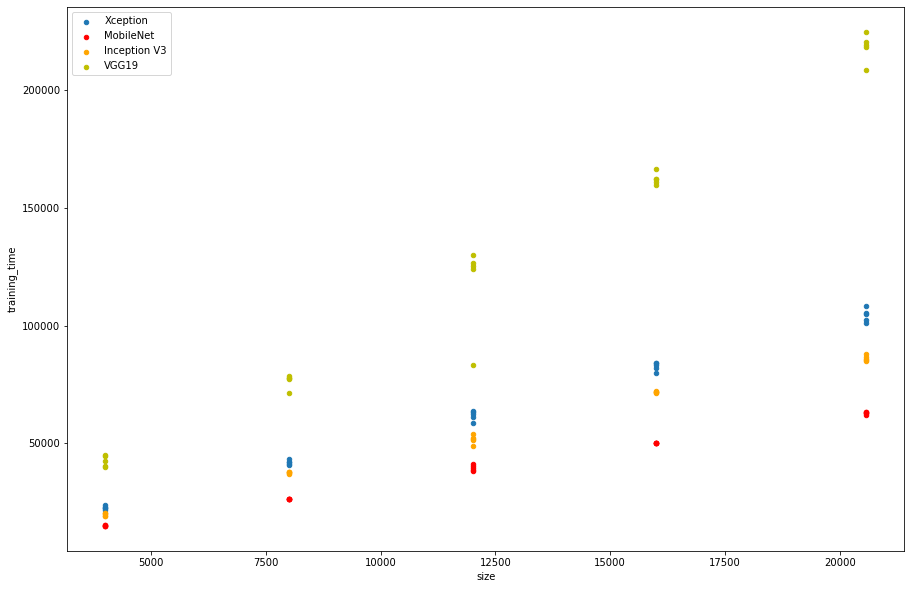

In [11]:
ax = xc.plot(kind='scatter', x='size', y='training_time', label='Xception', figsize=(15,10))
mn.plot(kind='scatter', x='size', y='training_time', label='MobileNet', c='r', figsize=(15,10), ax=ax)
i.plot(kind='scatter', x='size', y='training_time', label='Inception V3', c='orange', figsize=(15,10), ax=ax)
vgg.plot(kind='scatter', x='size', y='training_time', label='VGG19', c='y', figsize=(15,10), ax=ax);

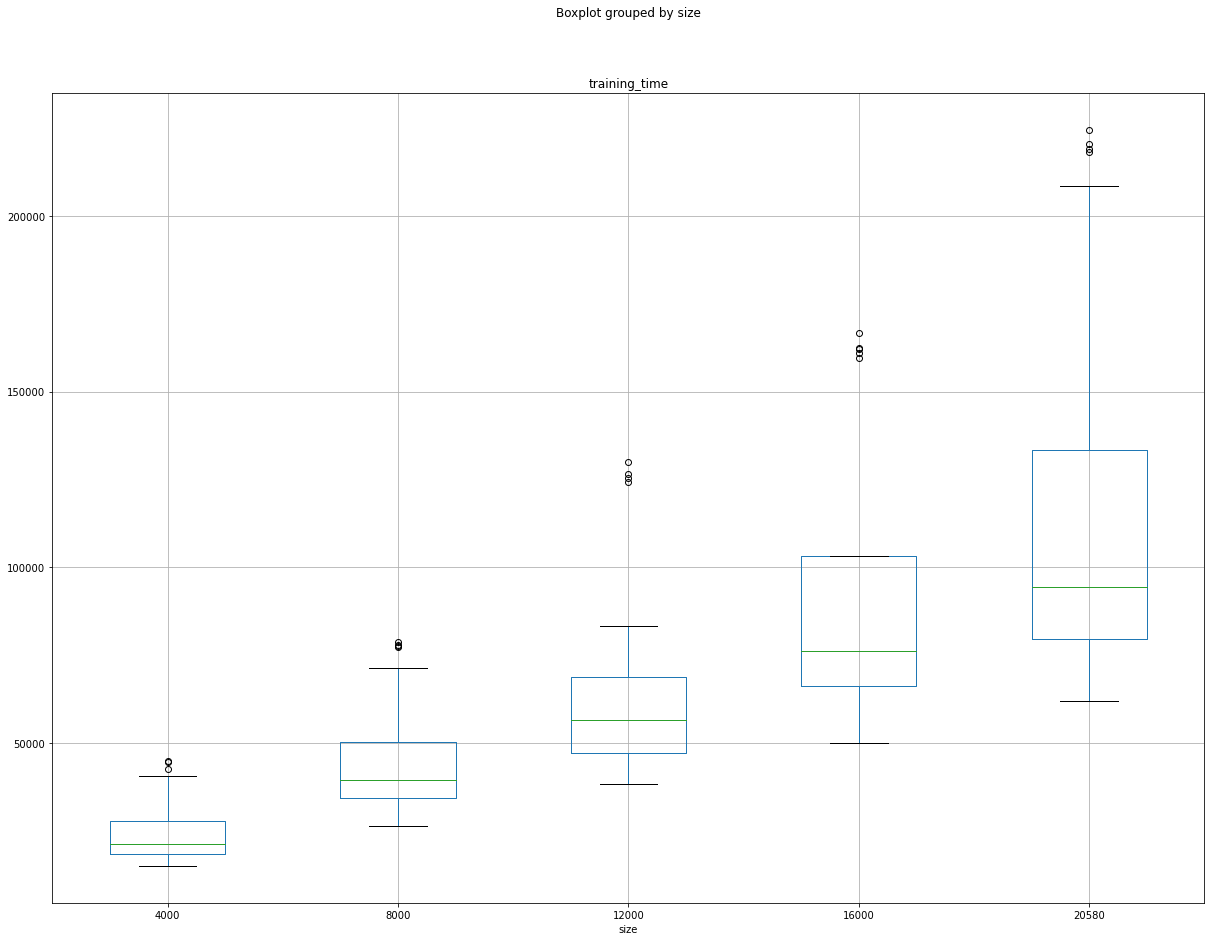

In [12]:
data.boxplot(by='size', column='training_time', figsize=(20,15));

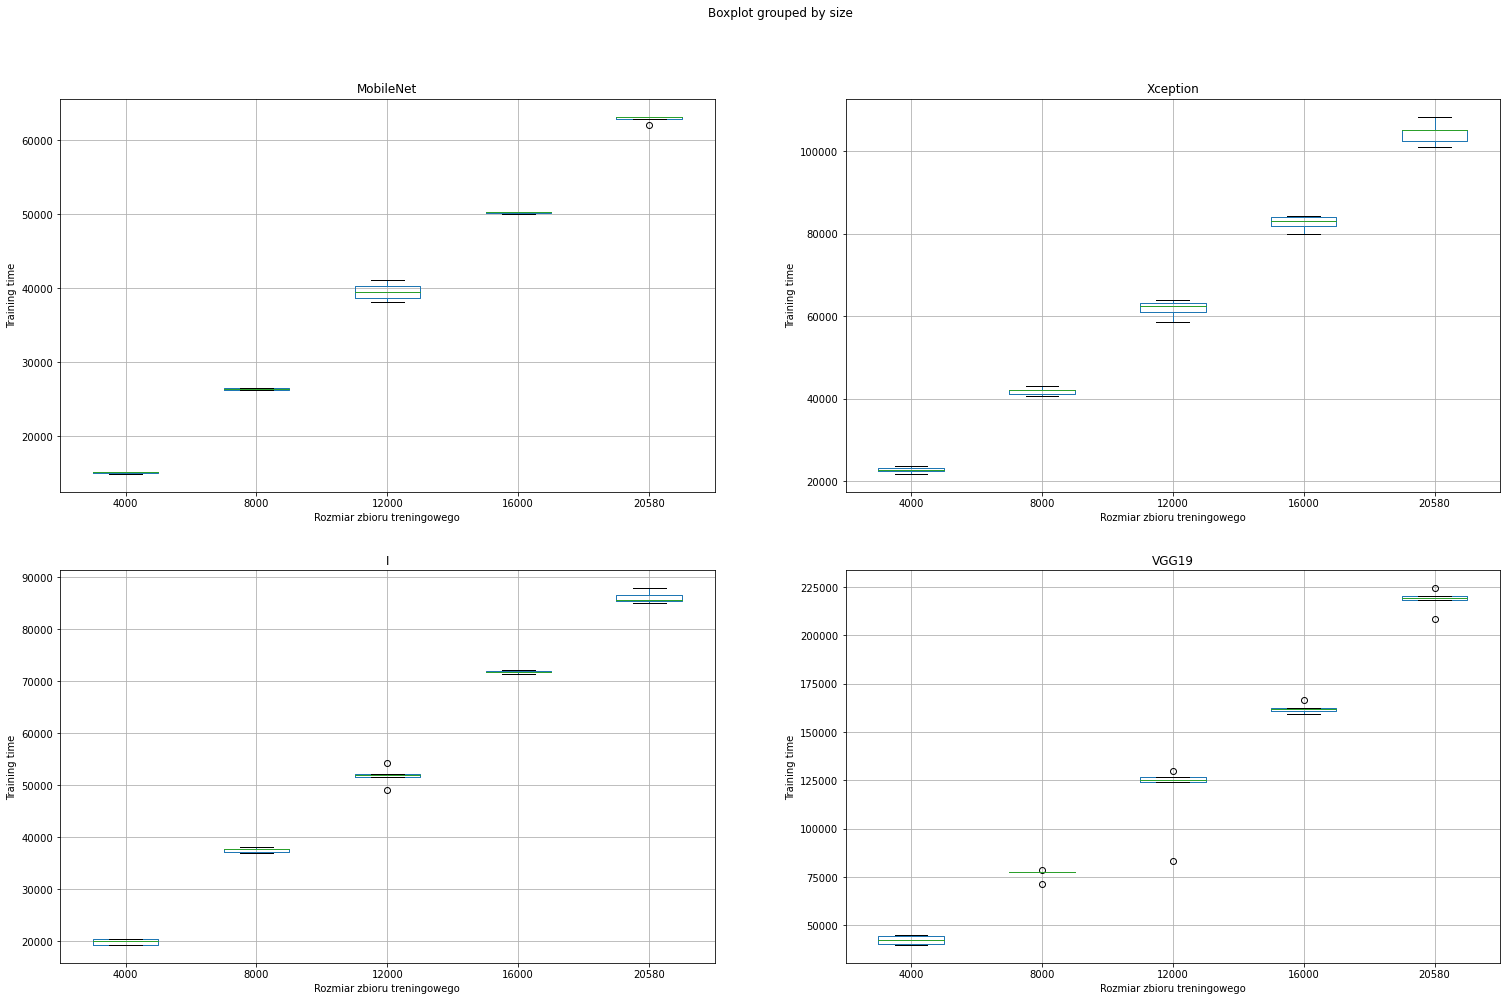

In [13]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(25,16))
fig.suptitle('Accuraccy', fontsize=30)

data[data['type']=='MN'].boxplot(by='size', column='training_time', ax=axes[0,0])
axes[0,0].set_title('MobileNet')

data[data['type']=='XC'].boxplot(by='size', column='training_time', ax=axes[0,1])
axes[0,1].set_title('Xception')

data[data['type']=='I'].boxplot(by='size', column='training_time', ax=axes[1,0])
axes[1,0].set_title('I')

data[data['type']=='VGG19'].boxplot(by='size', column='training_time', ax=axes[1,1])
axes[1,1].set_title('VGG19')

for c in axes:
    for ax in c:
        ax.set_xlabel('Rozmiar zbioru treningowego', fontsize=10)
        ax.set_ylabel('Training time', fontsize=10)
    
plt.show()

There are no major variations for training time. The general linear trend was followed with each of the algorithms.

In [21]:
data['training_time_min'] = data['training_time'] / 60
data['training_time_hr'] = data['training_time_min'] / 60

In [27]:
print(f"Trainging all of alghoritms took: {data['training_time_hr'].sum() / 24} days")

Trainging all of alghoritms took: 80.56945369440398 days


In [26]:
data['training_time_hr'].sort_values(ascending=False).head()

24    62.384269
28    61.248608
25    60.871702
26    60.633272
27    57.903211
Name: training_time_hr, dtype: float64

Biggest network on biggest set took around 60 hours 